MACHINE LEARNING ALGORITHMS

1. LINEAR REGRESSION

Example Data set : Super Market Sales

1. import necessary libraries

In [1]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [3]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\superstore_sales.csv")

In [4]:
df

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Base Margin,Ship Date
0,3,13-10-2010,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,0.80,20-10-2010
1,293,01-10-2012,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,0.58,02-10-2012
2,293,01-10-2012,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,0.39,03-10-2012
3,483,10-07-2011,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,0.58,12-07-2011
4,515,28-08-2010,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,0.50,30-08-2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,55558,09-08-2010,Medium,8,1294.0400,0.05,Delivery Truck,-323.18,150.98,66.27,Mick Brown,Alberta,West,Consumer,Furniture,Bookcases,0.65,09-08-2010
8395,55558,09-08-2010,Medium,23,392.5700,0.04,Regular Air,22.25,17.07,8.13,Mick Brown,Alberta,West,Consumer,Office Supplies,Envelopes,0.38,11-08-2010
8396,56550,08-04-2011,Not Specified,37,823.7800,0.03,Express Air,343.05,22.23,5.08,Frank Hawley,Alberta,West,Home Office,Furniture,Office Furnishings,0.41,10-04-2011
8397,56550,08-04-2011,Not Specified,8,469.8375,0.00,Regular Air,-159.24,65.99,8.99,Frank Hawley,Alberta,West,Home Office,Technology,Telephones and Communication,0.56,09-04-2011


In [5]:
df.shape

(8399, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order ID              8399 non-null   int64  
 1   Order Date            8399 non-null   object 
 2   Order Priority        8399 non-null   object 
 3   Order Quantity        8399 non-null   int64  
 4   Sales                 8399 non-null   float64
 5   Discount              8399 non-null   float64
 6   Ship Mode             8399 non-null   object 
 7   Profit                8399 non-null   float64
 8   Unit Price            8399 non-null   float64
 9   Shipping Cost         8399 non-null   float64
 10  Customer Name         8399 non-null   object 
 11  Province              8399 non-null   object 
 12  Region                8399 non-null   object 
 13  Customer Segment      8399 non-null   object 
 14  Product Category      8399 non-null   object 
 15  Product Sub-Category 

In [7]:
df.describe()

,Order ID,Order Quantity,Sales,Discount,Profit,Unit Price,Shipping Cost,Product Base Margin
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8336.000000
mean,29965.179783,25.571735,1775.878179,0.049671,181.184424,89.346259,12.838557,0.512513
std,17260.883447,14.481071,3585.050525,0.031823,1196.653371,290.354383,17.264052,0.135589
min,3.000000,1.000000,2.240000,0.000000,-14140.700000,0.990000,0.490000,0.350000
25%,15011.500000,13.000000,143.195000,0.020000,-83.315000,6.480000,3.300000,0.380000
50%,29857.000000,26.000000,449.420000,0.050000,-1.500000,20.990000,6.070000,0.520000
75%,44596.000000,38.000000,1709.320000,0.080000,162.750000,85.990000,13.990000,0.590000
max,59973.000000,50.000000,89061.050000,0.250000,27220.690000,6783.020000,164.730000,0.850000


In [8]:
df.isnull().sum()

Order ID                 0
Order Date               0
Order Priority           0
Order Quantity           0
Sales                    0
Discount                 0
Ship Mode                0
Profit                   0
Unit Price               0
Shipping Cost            0
Customer Name            0
Province                 0
Region                   0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Base Margin     63
Ship Date                0
dtype: int64

In [9]:
df['Product Base Margin'].isna().sum()

63

In [10]:
df['Product Base Margin'].head(20)

0     0.80
1     0.58
2     0.39
3     0.58
4     0.50
5     0.37
6     0.38
7      NaN
8      NaN
9     0.38
10    0.40
11    0.53
12    0.50
13    0.71
14    0.37
15    0.53
16    0.40
17    0.60
18    0.68
19    0.59
Name: Product Base Margin, dtype: float64

In [11]:
df['Product Base Margin'] = df['Product Base Margin'].fillna(0)

In [12]:
df['Product Base Margin'].head(10)

0    0.80
1    0.58
2    0.39
3    0.58
4    0.50
5    0.37
6    0.38
7    0.00
8    0.00
9    0.38
Name: Product Base Margin, dtype: float64

In [13]:
df.describe()

,Order ID,Order Quantity,Sales,Discount,Profit,Unit Price,Shipping Cost,Product Base Margin
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000
mean,29965.179783,25.571735,1775.878179,0.049671,181.184424,89.346259,12.838557,0.508669
std,17260.883447,14.481071,3585.050525,0.031823,1196.653371,290.354383,17.264052,0.142134
min,3.000000,1.000000,2.240000,0.000000,-14140.700000,0.990000,0.490000,0.000000
25%,15011.500000,13.000000,143.195000,0.020000,-83.315000,6.480000,3.300000,0.380000
50%,29857.000000,26.000000,449.420000,0.050000,-1.500000,20.990000,6.070000,0.520000
75%,44596.000000,38.000000,1709.320000,0.080000,162.750000,85.990000,13.990000,0.590000
max,59973.000000,50.000000,89061.050000,0.250000,27220.690000,6783.020000,164.730000,0.850000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order ID              8399 non-null   int64  
 1   Order Date            8399 non-null   object 
 2   Order Priority        8399 non-null   object 
 3   Order Quantity        8399 non-null   int64  
 4   Sales                 8399 non-null   float64
 5   Discount              8399 non-null   float64
 6   Ship Mode             8399 non-null   object 
 7   Profit                8399 non-null   float64
 8   Unit Price            8399 non-null   float64
 9   Shipping Cost         8399 non-null   float64
 10  Customer Name         8399 non-null   object 
 11  Province              8399 non-null   object 
 12  Region                8399 non-null   object 
 13  Customer Segment      8399 non-null   object 
 14  Product Category      8399 non-null   object 
 15  Product Sub-Category 

In [15]:
df

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Base Margin,Ship Date
0,3,13-10-2010,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,0.80,20-10-2010
1,293,01-10-2012,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,0.58,02-10-2012
2,293,01-10-2012,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,0.39,03-10-2012
3,483,10-07-2011,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,0.58,12-07-2011
4,515,28-08-2010,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,0.50,30-08-2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,55558,09-08-2010,Medium,8,1294.0400,0.05,Delivery Truck,-323.18,150.98,66.27,Mick Brown,Alberta,West,Consumer,Furniture,Bookcases,0.65,09-08-2010
8395,55558,09-08-2010,Medium,23,392.5700,0.04,Regular Air,22.25,17.07,8.13,Mick Brown,Alberta,West,Consumer,Office Supplies,Envelopes,0.38,11-08-2010
8396,56550,08-04-2011,Not Specified,37,823.7800,0.03,Express Air,343.05,22.23,5.08,Frank Hawley,Alberta,West,Home Office,Furniture,Office Furnishings,0.41,10-04-2011
8397,56550,08-04-2011,Not Specified,8,469.8375,0.00,Regular Air,-159.24,65.99,8.99,Frank Hawley,Alberta,West,Home Office,Technology,Telephones and Communication,0.56,09-04-2011


 **Sales and Profit Analysis**
1. What is the total sales, profit, and shipping cost across the dataset?


In [16]:
Total_sales, Total_Profit, Total_shipping_cost = df[['Sales', 'Profit', 'Shipping Cost']].sum()

In [17]:
print("Total sales:", round(Total_sales,2))
print("Total profit:", round(Total_Profit,2))
print("Total Shipping cost:", round(Total_shipping_cost,2))

Total sales: 14915600.82
Total profit: 1521767.98
Total Shipping cost: 107831.04


2. Which provinces contribute the most and least to overall sales?

In [18]:
province = df.groupby('Province')['Sales'].sum()
round(province,2)

Province
Alberta                  1704791.49
British Columbia         1892757.78
Manitoba                 1372848.78
New Brunswick             684211.52
Newfoundland              102924.07
Northwest Territories     800847.33
Nova Scotia               817729.36
Nunavut                   116376.48
Ontario                  3063212.48
Prince Edward Island      409383.25
Quebec                   1510195.08
Saskachewan              1464455.82
Yukon                     975867.37
Name: Sales, dtype: float64

In [19]:
most_contributed_province = province.idxmax()

In [20]:
most_contributed_province

'Ontario'

In [21]:
least_contributed_province = province.idxmin()

In [22]:
least_contributed_province

'Newfoundland'

In [23]:
print(f"Most_contributed Province overall to sales: { most_contributed_province}")

Most_contributed Province overall to sales: Ontario


In [24]:
print(f"Least_contributed Province overall to sales: { least_contributed_province}")

Least_contributed Province overall to sales: Newfoundland


3. What is the average profit margin (Profit/Sales) for each region?

In [25]:
df['Profit Margin'] = df['Profit'] / df['Sales']

In [26]:
df['Profit Margin']

0      -0.815363
1       0.045225
2       0.190988
3       0.241447
4       0.078474
          ...   
8394   -0.249745
8395    0.056678
8396    0.416434
8397   -0.338926
8398    0.286489
Name: Profit Margin, Length: 8399, dtype: float64

In [27]:
region  = df.groupby('Region')['Profit Margin'].mean()

In [28]:
region

Region
Atlantic                -0.115772
Northwest Territories   -0.120283
Nunavut                 -0.136512
Ontario                 -0.134144
Prarie                  -0.120915
Quebec                  -0.136977
West                    -0.141268
Yukon                   -0.172624
Name: Profit Margin, dtype: float64

4. Are there specific product categories or subcategories that consistently yield high profits?

In [29]:
products = df.groupby('Product Category')['Profit'].sum().sort_values(ascending = False)

In [30]:
products

Product Category
Technology         886313.52
Office Supplies    518021.43
Furniture          117433.03
Name: Profit, dtype: float64

In [31]:
products_sub_category = df.groupby('Product Sub-Category')['Profit'].sum().sort_values(ascending = False)

In [32]:
products_sub_category

Product Sub-Category
Telephones and Communication      316951.62
Office Machines                   307712.93
Binders and Binder Accessories    307413.39
Copiers and Fax                   167361.49
Chairs & Chairmats                149649.73
Office Furnishings                100427.93
Appliances                         97158.06
Computer Peripherals               94287.48
Envelopes                          48182.60
Paper                              45263.20
Labels                             13677.17
Pens & Art Supplies                 7564.78
Storage & Organization              6664.15
Rubber Bands                        -102.67
Scissors, Rulers and Trimmers      -7799.25
Bookcases                         -33582.13
Tables                            -99062.50
Name: Profit, dtype: float64

5. Is there any correlation between discount percentage and profit?

In [33]:
correlation = df['Discount'].corr(df['Profit'])

In [34]:
print(f"The correlation between discount and profit: {correlation}")

The correlation between discount and profit: -0.037128373576373545


<Axes: xlabel='Discount', ylabel='Profit'>

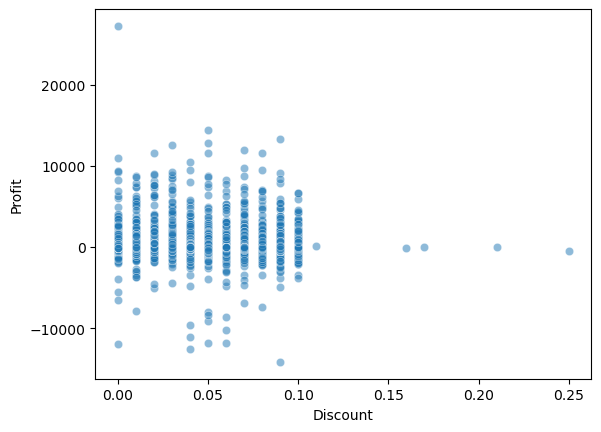

In [35]:
sns.scatterplot(data = df, x='Discount', y='Profit', alpha = 0.5)

6. What is the average order quantity across all orders?


In [36]:
order_quantity  = df.groupby('Product Category')['Order Quantity'].mean()

In [37]:
order_quantity

Product Category
Furniture          25.709977
Office Supplies    25.656833
Technology         25.266344
Name: Order Quantity, dtype: float64

In [38]:
order_sub_quantity  = df.groupby('Product Sub-Category')['Order Quantity'].mean()

In [39]:
order_sub_quantity

Product Sub-Category
Appliances                        25.117512
Binders and Binder Accessories    25.127869
Bookcases                         25.878307
Chairs & Chairmats                24.844560
Computer Peripherals              25.358839
Copiers and Fax                   24.459770
Envelopes                         26.739837
Labels                            25.350694
Office Furnishings                26.203046
Office Machines                   23.311573
Paper                             25.200816
Pens & Art Supplies               26.824645
Rubber Bands                      27.486034
Scissors, Rulers and Trimmers     27.298611
Storage & Organization            25.282051
Tables                            25.470914
Telephones and Communication      26.012458
Name: Order Quantity, dtype: float64

In [40]:
order_quantity_overall = df['Order Quantity'].mean()

In [41]:
order_quantity_overall

25.571734730325037

7. How does customer segment affect sales and profitability?


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order ID              8399 non-null   int64  
 1   Order Date            8399 non-null   object 
 2   Order Priority        8399 non-null   object 
 3   Order Quantity        8399 non-null   int64  
 4   Sales                 8399 non-null   float64
 5   Discount              8399 non-null   float64
 6   Ship Mode             8399 non-null   object 
 7   Profit                8399 non-null   float64
 8   Unit Price            8399 non-null   float64
 9   Shipping Cost         8399 non-null   float64
 10  Customer Name         8399 non-null   object 
 11  Province              8399 non-null   object 
 12  Region                8399 non-null   object 
 13  Customer Segment      8399 non-null   object 
 14  Product Category      8399 non-null   object 
 15  Product Sub-Category 

In [43]:
customer_segment = df.groupby('Customer Segment').agg(
total_sales =  ('Sales', 'sum'),
total_profit = ('Profit', 'sum'),
Average_sales = ('Sales', 'mean'),
Average_profit = ('Profit', 'mean')
).sort_values(by = 'total_sales', ascending = False)

In [44]:
round(customer_segment,2)

,total_sales,total_profit,Average_sales,Average_profit
Customer Segment,,,,
Corporate,5498904.88,599746.00,1787.68,194.98
Home Office,3564763.88,318354.03,1754.31,156.67
Consumer,3063611.08,287959.94,1857.86,174.63
Small Business,2788320.99,315708.01,1698.12,192.27


8. Which customer segment has the highest average order quantity?

In [45]:
highest_order_quantity = df.groupby('Customer Segment')['Order Quantity'].mean().sort_values(ascending = False)

In [46]:
highest_order_quantity = highest_order_quantity.idxmax()

In [47]:
highest_order_quantity

'Home Office'

9. What is the distribution of order priorities, and how do they affect shipping cost or profit?

In [48]:
distribution_of_order_priorities = df.groupby('Order Priority')['Shipping Cost', 'Profit'].agg(['sum', 'mean'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18852\177740109.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  distribution_of_order_priorities = df.groupby('Order Priority')['Shipping Cost', 'Profit'].agg(['sum', 'mean'])


In [49]:
distribution_of_order_priorities

Shipping Cost                Profit            
                         sum       mean        sum        mean
Order Priority                                                
Critical            21112.68  13.129776  182876.87  113.729397
High                22665.42  12.819808  407069.65  230.243015
Low                 22946.86  13.341198  386184.90  224.526105
Medium              20513.93  12.577517  327051.73  200.522213
Not Specified       20592.15  12.315879  218584.83  130.732554

<Axes: xlabel='Order Priority', ylabel='Shipping Cost'>

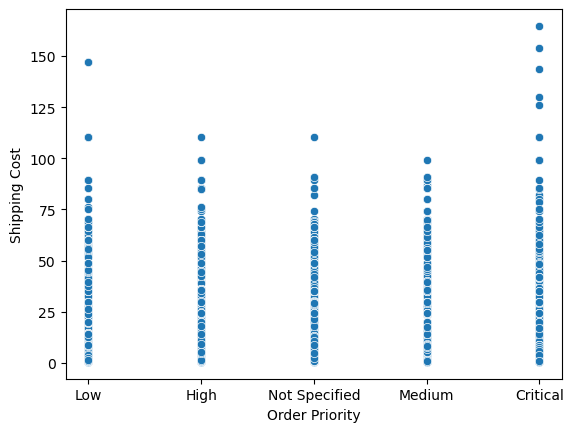

In [50]:
sns.scatterplot(data=df, x='Order Priority', y='Shipping Cost')


10. Which customers generate the most revenue and profit?


In [66]:
top_customers = df.groupby('Customer Name')[['Sales','Profit']].sum().sort_values(by='Sales',ascending = False).head(10)
top_customers

,Sales,Profit
Customer Name,,
Emily Phan,117124.4380,34005.44
Deborah Brumfield,97433.1355,31121.22
Roy Skaria,92542.1530,1343.94
Sylvia Foulston,88875.7575,5141.90
Grant Carroll,88417.0025,27977.29
Alejandro Grove,83561.9300,20588.92
Darren Budd,81577.3435,1857.66
Julia Barnett,80044.4520,-1956.09
John Lucas,79696.1875,12725.08



11. What is the average shipping cost for each shipping mode?


In [70]:
average_shipping_cost = df.groupby('Ship Mode')['Shipping Cost'].mean()
average_shipping_cost

Ship Mode
Delivery Truck    45.350733
Express Air        7.986684
Regular Air        7.656809
Name: Shipping Cost, dtype: float64

12. Does shipping mode affect the delivery time (difference between Order Date and Ship Date)?

In [81]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Delivery Time(Days)'] =  (df['Ship Date'] - df['Order Date']).dt.days
shipping_analysis = df.groupby('Ship Mode')['Delivery Time(Days)'].mean().sort_values(ascending =False)
shipping_analysis

Ship Mode
Express Air       4.752798
Regular Air       0.667464
Delivery Truck    0.077661
Name: Delivery Time(Days), dtype: float64

(0.0, 300.0)

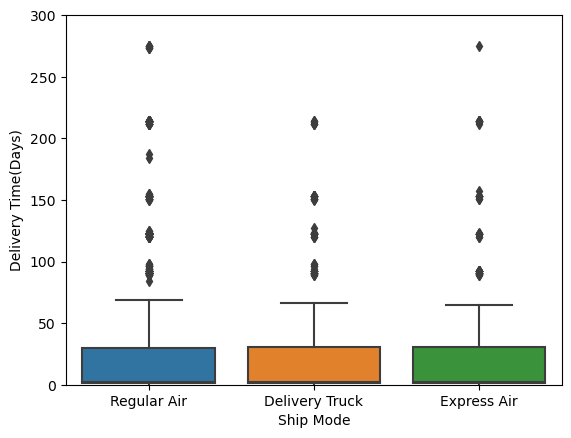

In [84]:
ax1 = sns.boxplot(data = df, x = 'Ship Mode', y='Delivery Time(Days)')
ax1.set_ylim(0,300)

13. Which provinces incur the highest average shipping costs?

In [89]:
highest_average_shipping_cost = df.groupby('Province')['Shipping Cost'].mean().sort_values(ascending =False)
highest_average_shipping_cost

Province
Prince Edward Island     14.077630
Nova Scotia              13.966422
Yukon                    13.781937
Northwest Territories    13.753629
Quebec                   13.499795
Manitoba                 13.178676
Ontario                  12.856112
Alberta                  12.853954
Nunavut                  12.769494
New Brunswick            12.527585
British Columbia         11.957798
Newfoundland             11.751463
Saskachewan              11.413187
Name: Shipping Cost, dtype: float64

14. How does shipping cost impact profit for different regions?

In [93]:
shipping_cost_analaysis = df.groupby('Region')[['Shipping Cost','Profit']].mean().sort_values(by='Shipping Cost', ascending =False)
shipping_cost_analaysis

,Shipping Cost,Profit
Region,,
Yukon,13.781937,136.253155
Northwest Territories,13.753629,255.464670
Quebec,13.499795,179.803649
Atlantic,13.389657,221.259870
Ontario,12.856112,189.960865
Nunavut,12.769494,35.963418
West,12.347137,149.175595
Prarie,12.233839,188.253294


Text(0, 0.5, 'Amount')

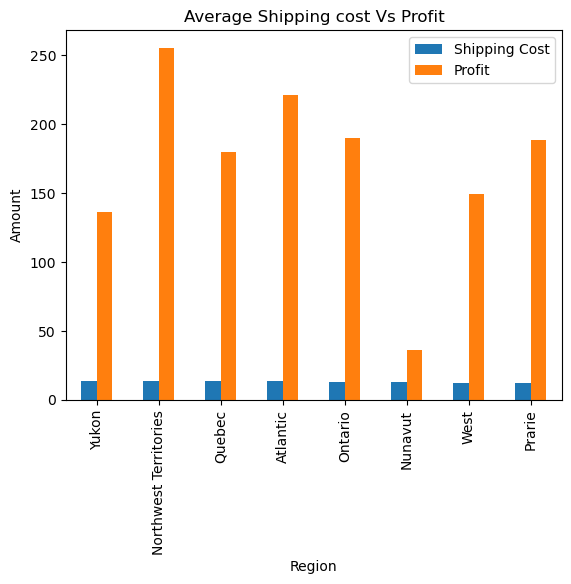

In [97]:
shipping_cost_analaysis.plot(kind = 'bar' )
plt.title('Average Shipping cost Vs Profit')
plt.ylabel('Amount')

In [ ]:
### **Time-Based Analysis**
15. What are the monthly or yearly trends in sales and profit?
16. Are there specific times of the year (e.g., months, seasons) where sales spike?
17. Does the order priority distribution change over time?


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              8399 non-null   int64         
 1   Order Date            8399 non-null   datetime64[ns]
 2   Order Priority        8399 non-null   object        
 3   Order Quantity        8399 non-null   int64         
 4   Sales                 8399 non-null   float64       
 5   Discount              8399 non-null   float64       
 6   Ship Mode             8399 non-null   object        
 7   Profit                8399 non-null   float64       
 8   Unit Price            8399 non-null   float64       
 9   Shipping Cost         8399 non-null   float64       
 10  Customer Name         8399 non-null   object        
 11  Province              8399 non-null   object        
 12  Region                8399 non-null   object        
 13  Customer Segment  

In [116]:
df['Month'] = df['Order Date'].dt.month
df['Month_name'] = df['Order Date'].dt.strftime('%B')
df['Year'] = df['Order Date'].dt.year

In [131]:
yearly_trends = df.groupby('Year')[['Sales','Profit']].sum()
yearly_trends = round(yearly_trends,2)
yearly_trends

,Sales,Profit
Year,,
2009,4209139.46,434538.73
2010,3549680.80,363871.48
2011,3436816.70,381455.99
2012,3719963.86,341901.78


In [124]:
monthly_trends = df.groupby('Month')[['Sales','Profit']].sum().sort_index()
monthly_trends = round(monthly_trends,2)
monthly_trends

,Sales,Profit
Month,,
1,1157985.09,107666.32
2,1270772.74,133402.94
3,1281884.58,136423.37
4,1256957.10,127220.84
5,1339404.78,161068.81
6,1119779.79,104053.56
7,1207589.66,119723.38
8,944130.56,74996.68
9,1318203.47,175390.67


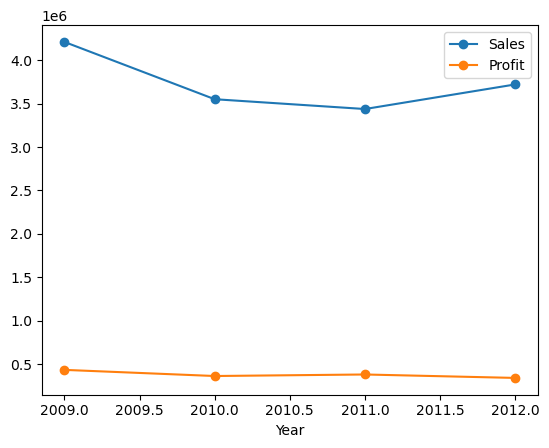

In [136]:
ax3 = yearly_trends.plot(kind = 'line', marker = 'o')

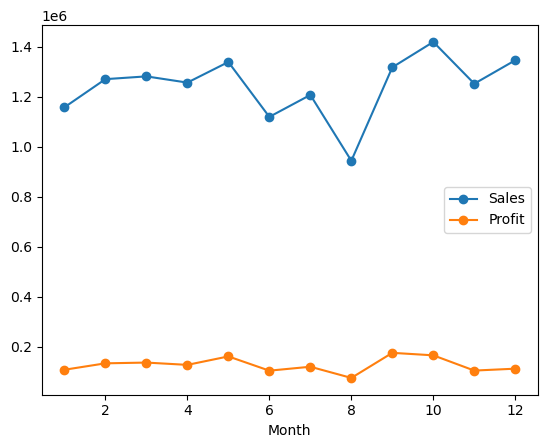

In [137]:
ax4 = monthly_trends.plot(kind='line', marker = 'o')

Does the order priority distribution change over time?

In [138]:
order_priority = df.groupby(['Year', 'Order Priority'])['Order ID'].count().unstack()
order_priority

Order Priority,Critical,High,Low,Medium,Not Specified
Year,,,,,
2009,443,417,420,428,445
2010,342,454,483,447,416
2011,412,449,385,369,387
2012,411,448,432,387,424


In [ ]:
19. Which product subcategories have the highest and lowest average unit prices?
20. What is the relationship between product base margin and profitability?
21. How does the discount percentage vary across product categories and subcategories?
22. Which product subcategories are most frequently ordered?


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              8399 non-null   int64         
 1   Order Date            8399 non-null   datetime64[ns]
 2   Order Priority        8399 non-null   object        
 3   Order Quantity        8399 non-null   int64         
 4   Sales                 8399 non-null   float64       
 5   Discount              8399 non-null   float64       
 6   Ship Mode             8399 non-null   object        
 7   Profit                8399 non-null   float64       
 8   Unit Price            8399 non-null   float64       
 9   Shipping Cost         8399 non-null   float64       
 10  Customer Name         8399 non-null   object        
 11  Province              8399 non-null   object        
 12  Region                8399 non-null   object        
 13  Customer Segment  

In [142]:
average_unit_prices =  df.groupby('Product Sub-Category')['Unit Price'].mean()
highest_unit_price = average_unit_prices.idxmax()
lowest_unit_price = average_unit_prices.idxmin()
highest_unit_price, lowest_unit_price

('Copiers and Fax', 'Rubber Bands')

In [146]:
relationship = df['Product Base Margin'].corr(df['Profit'])
relationship

-0.11485220070092586

In [153]:
discount = df.groupby(['Product Category','Product Sub-Category'])['Discount'].mean()
discount

Product Category  Product Sub-Category          
Furniture         Bookcases                         0.048095
                  Chairs & Chairmats                0.050311
                  Office Furnishings                0.048807
                  Tables                            0.049861
Office Supplies   Appliances                        0.050645
                  Binders and Binder Accessories    0.050383
                  Envelopes                         0.048862
                  Labels                            0.049549
                  Paper                             0.049412
                  Pens & Art Supplies               0.051280
                  Rubber Bands                      0.051508
                  Scissors, Rulers and Trimmers     0.049236
                  Storage & Organization            0.051081
Technology        Computer Peripherals              0.048575
                  Copiers and Fax                   0.051494
                  Office Machines   

In [161]:
frequently_ordered = df.groupby('Product Sub-Category')['Order ID'].count().sort_values(ascending = False)
frequently_ordered

Product Sub-Category
Paper                             1225
Binders and Binder Accessories     915
Telephones and Communication       883
Office Furnishings                 788
Computer Peripherals               758
Pens & Art Supplies                633
Storage & Organization             546
Appliances                         434
Chairs & Chairmats                 386
Tables                             361
Office Machines                    337
Labels                             288
Envelopes                          246
Bookcases                          189
Rubber Bands                       179
Scissors, Rulers and Trimmers      144
Copiers and Fax                     87
Name: Order ID, dtype: int64

23. Which region contributes the most to total sales and profit?

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              8399 non-null   int64         
 1   Order Date            8399 non-null   datetime64[ns]
 2   Order Priority        8399 non-null   object        
 3   Order Quantity        8399 non-null   int64         
 4   Sales                 8399 non-null   float64       
 5   Discount              8399 non-null   float64       
 6   Ship Mode             8399 non-null   object        
 7   Profit                8399 non-null   float64       
 8   Unit Price            8399 non-null   float64       
 9   Shipping Cost         8399 non-null   float64       
 10  Customer Name         8399 non-null   object        
 11  Province              8399 non-null   object        
 12  Region                8399 non-null   object        
 13  Customer Segment  

In [171]:
contribute= df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by = ['Sales','Profit'], ascending = False)
contribute_sales = contribute['Sales'].idxmax()
contribute_Profit = contribute['Profit'].idxmax()
print(f"most Contributed regions for total sales : {contribute_sales}")
print(f"most Contributed regions for total profit : {contribute_Profit}")

most Contributed regions for total sales : West
most Contributed regions for total profit : Ontario


Which provinces have the highest and lowest average order quantities?

In [178]:
provinces = df.groupby('Province')['Order Quantity'].mean().sort_values(ascending = False)
provinces_highest = provinces.idxmax()
provinces_lowest = provinces.idxmin()
print(f'{provinces_highest} province has the highest average order quanitites')
print(f'{provinces_lowest} province has the lowest average order quantities')

Prince Edward Island province has the highest average order quanitites
Newfoundland province has the lowest average order quantities


Build Linear Regression

In [179]:
df1 = df.copy()

In [180]:
Y = df1['Sales']

In [226]:
X = df1[['Order Quantity', 'Discount','Profit','Unit Price','Profit Margin']] 

In [227]:
X.shape ,  Y.shape

((8399, 5), (8399,))

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [230]:
X_train.shape, Y_train.shape

((6719, 5), (6719,))

In [231]:
X_test.shape, Y_test.shape

((1680, 5), (1680,))

In [232]:
model = linear_model.LinearRegression()

In [233]:
model.fit(X_train, Y_train)

LinearRegression()

In [238]:
Y_pred = model.predict(X_test)

In [239]:
Y_pred

array([2379.36058468, 1203.59044489, 1179.3586998 , ...,  376.07469902,
       4211.28477519, 4368.59192227])

Text(0.5, 1.0, 'Actual Sales VS Predicted Sales')

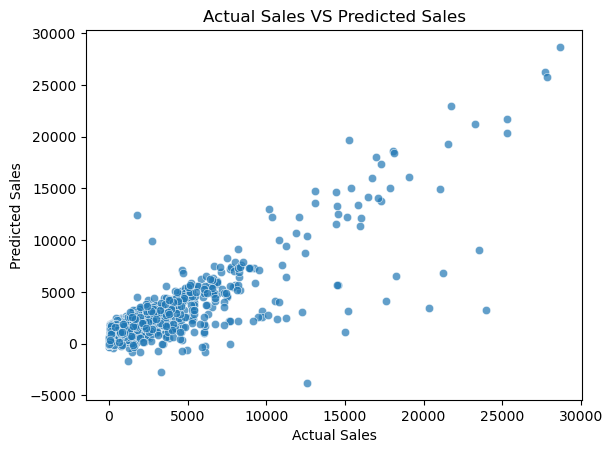

In [241]:
ax = sns.scatterplot(x = Y_test, y=Y_pred, alpha = 0.7)
ax.set_xlabel("Actual Sales")
ax.set_ylabel("Predicted Sales")
ax.set_title("Actual Sales VS Predicted Sales")